Plotting recorded data for all power levels

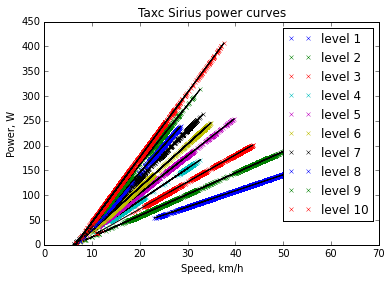

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

coeffs = np.empty([10, 2])
for i in range(1,11):
    x = []
    y = []
    
    with open('sirius_data/sirius_' + str(i) + '.cvs','r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            x.append(float(row[2]))
            y.append(float(row[3]))
        
    x = np.asarray(x)
    y = np.asarray(y)
    xy = np.vstack((x,y))
    xy = xy.T
    xy = xy[~np.any(xy == 0, axis=1)]
    plt.plot(xy[:,0],xy[:,1], 'x', label='level '+ str(i), markersize = 4)
    
    X = np.vstack([xy[:,0], np.ones(len(xy[:,0]))]).T
    coeffs[i-1] = np.linalg.lstsq(X, xy[:,1])[0]
    plt.plot(x, coeffs[i-1,0]*x + coeffs[i-1,1], 'black')

plt.xlabel('Speed, km/h')
plt.ylabel('Power, W')
plt.title('Tacx Sirius power curves')
plt.legend()
plt.axis([0, 70, 0, 450])
plt.show()

As it is seen from the plot all points lie on a straight lines.

Parameters of the lines can be obtained by the method of least squares.

In [100]:
print coeffs

[[  3.23874687 -20.64808196]
 [  4.30606133 -27.25589246]
 [  5.44879778 -36.57159131]
 [  6.48525956 -40.48616615]
 [  7.60643338 -48.35481582]
 [  8.73140257 -58.57819586]
 [  9.73079724 -59.61416463]
 [ 10.94228338 -73.08258491]
 [ 11.99373782 -77.88781457]
 [ 13.09580164 -85.38477516]]
